# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
5,4250,12/30/1925,Ben-Hur,"$3,900,000","$9,000,000","$9,000,000"
6,4630,12/8/1927,Wings,"$2,000,000",$0,$0
7,5141,1/2/1929,The Broadway Melody,"$379,000","$4,358,000","$2,800,000"
8,4240,1/1/1930,Hell's Angels,"$4,000,000",$0,$0
9,5043,12/31/1931,Mata Hari,"$558,000","$900,000","$900,000"


In [6]:
data.tail(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5381,94,12/5/2017,King Arthur: Legend of the Sword,"$175,000,000","$140,012,608","$39,175,066"
5382,1254,12/5/2017,Snatched,"$42,000,000","$57,850,343","$45,850,343"
5383,2521,12/31/2017,The Thousand Miles,"$20,000,000",$0,$0
5384,321,9/3/2018,A Wrinkle in Time,"$103,000,000",$0,$0
5385,366,10/8/2018,Amusement Park,"$100,000,000",$0,$0
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [7]:
data.isna().values.any()

np.False_

In [8]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [9]:
data.duplicated().values.any()

np.False_

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
chars_to_remove = ['$', ',']

columns_to_convert = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']


In [13]:
for column in columns_to_convert:
    for char in chars_to_remove:
        data[column] = data[column].astype(str).str.replace(char, '')
    data[column] = pd.to_numeric(data[column], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [14]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [15]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')

In [16]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [17]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [18]:
print("The Average Production Budget is: $", data['USD_Production_Budget'].mean())
print("The Average Worldwide Gross is: $", data['USD_Worldwide_Gross'].mean())

The Average Production Budget is: $ 31113737.57837136
The Average Worldwide Gross is: $ 88855421.96271564


In [19]:
print("The Minimun Worldwide Gross is: $", data['USD_Worldwide_Gross'].min())
print("The Minimum Domestic Gross is: $", data['USD_Domestic_Gross'].min())

The Minimun Worldwide Gross is: $ 0
The Minimum Domestic Gross is: $ 0


In [20]:
print("The Highest Production Budget is: $", data['USD_Production_Budget'].max())
print("The Highest Worldwide Gross is: $", data['USD_Worldwide_Gross'].max())

The Highest Production Budget is: $ 425000000
The Highest Worldwide Gross is: $ 2783918982


In [21]:
print('Lowest Budget Movie:\n',data.loc[data['USD_Production_Budget'].idxmin()]) 

Lowest Budget Movie:
 Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object


In [22]:
print('Highest Budget Movie:\n', data.loc[data['USD_Production_Budget'].idxmax()])

Highest Budget Movie:
 Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object


In [23]:
data.sort_values(by='Rank')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099
...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [24]:
print("Total Movies with Zero Domestic Gross:", data[data['USD_Domestic_Gross'] == 0].shape[0])
data[data['USD_Domestic_Gross'] == 0].sort_values(by='USD_Production_Budget', ascending=False)

Total Movies with Zero Domestic Gross: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [25]:
print("Total Movies with Zero Worldwide Gross:", data[data['USD_Worldwide_Gross'] == 0].shape[0])
data[data['USD_Worldwide_Gross'] == 0].sort_values(by='USD_Production_Budget', ascending=False)

Total Movies with Zero Worldwide Gross: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [26]:
data.loc[data['USD_Domestic_Gross'] != 0].sort_values(by='USD_Domestic_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547
...,...,...,...,...,...,...
661,4673,1993-01-01,Ed and his Dead Mother,1800000,673,673
839,5379,1996-01-04,Bang,10000,527,527
2528,5135,2005-10-13,The Dark Hours,400000,423,423
3198,5380,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401


In [27]:
data.loc[data['USD_Worldwide_Gross'] != 0].sort_values(by='USD_Worldwide_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547
...,...,...,...,...,...,...
839,5379,1996-01-04,Bang,10000,527,527
4772,5005,2014-12-31,Destiny,750000,450,0
2528,5135,2005-10-13,The Dark Hours,400000,423,423
3198,5380,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401


In [28]:
data.loc[(data['USD_Worldwide_Gross'] != 0) & (data['USD_Domestic_Gross'] == 0)].sort_values(by='USD_Worldwide_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


In [29]:
data.loc[(data['USD_Worldwide_Gross'] == 0) & (data['USD_Domestic_Gross'] != 0)].sort_values(by='USD_Domestic_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [30]:
print('There are',len(data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')),'movies with zero domestic gross but non-zero worldwide gross.')
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

There are 155 movies with zero domestic gross but non-zero worldwide gross.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [31]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [32]:
data[data['Release_Date'] > scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [33]:
print(f'Total Movies Released After {scrape_date.date()}:', data[data['Release_Date'] > scrape_date].shape[0])

Total Movies Released After 2018-05-01: 7


In [34]:
cleaned_data = data[data['Release_Date'] <= scrape_date]
cleaned_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [35]:
print("Movies that Earned Less Worldwide than their Production Budget:", len(cleaned_data[cleaned_data['USD_Worldwide_Gross'] < cleaned_data['USD_Production_Budget']]))
cleaned_data[cleaned_data['USD_Worldwide_Gross'] < cleaned_data['USD_Production_Budget']]

Movies that Earned Less Worldwide than their Production Budget: 2007


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


# Seaborn for Data Viz: Bubble Charts

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

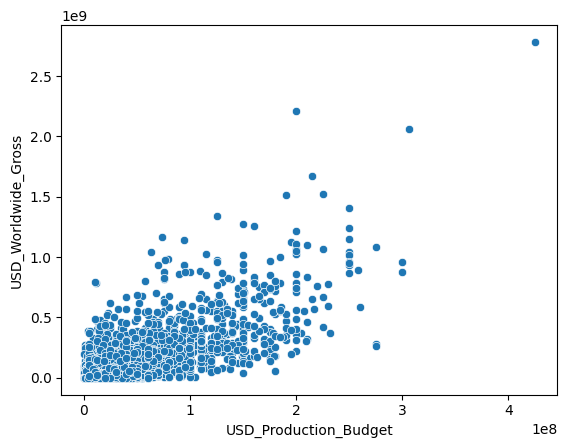

In [36]:
sns.scatterplot(x='USD_Production_Budget', y='USD_Worldwide_Gross', data=cleaned_data)

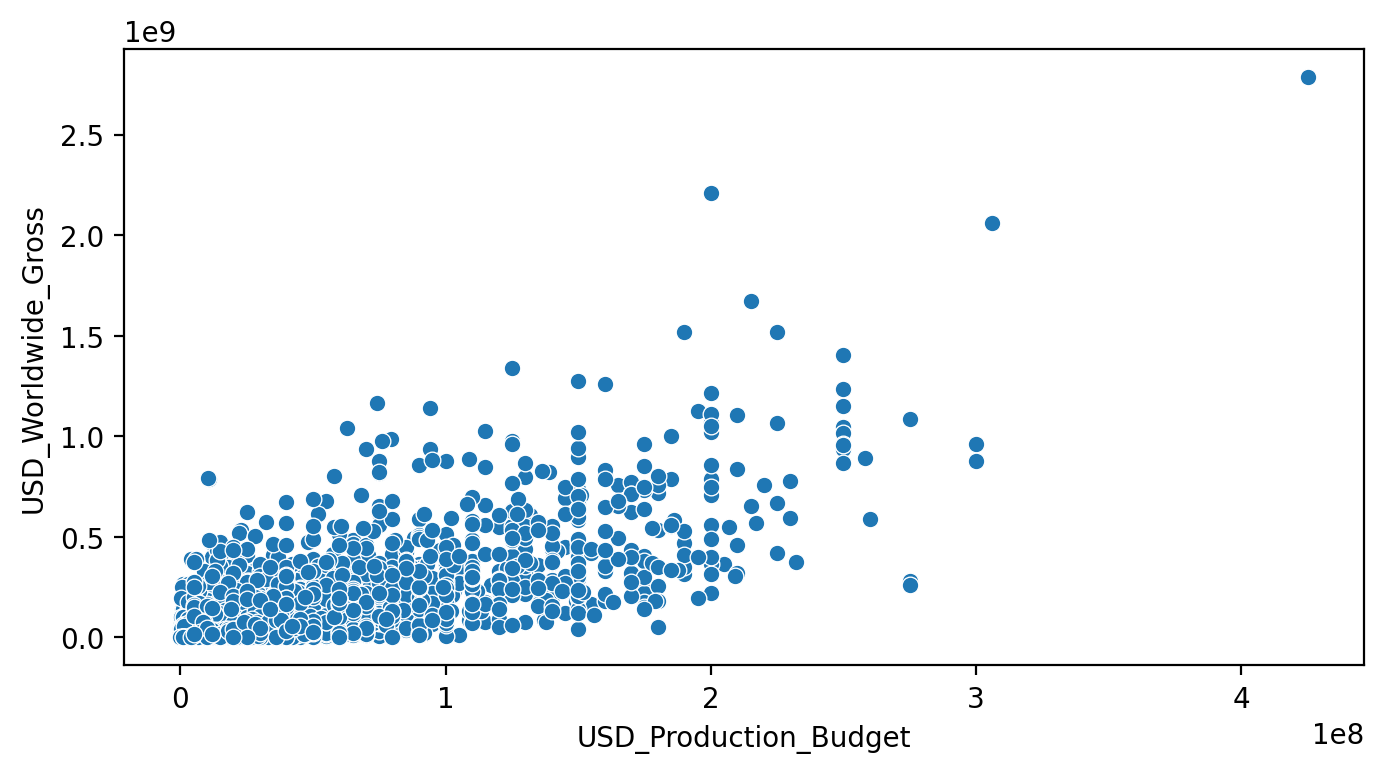

In [37]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot (data=cleaned_data, x='USD_Production_Budget',
y= 'USD_Worldwide_Gross')
plt.show ()

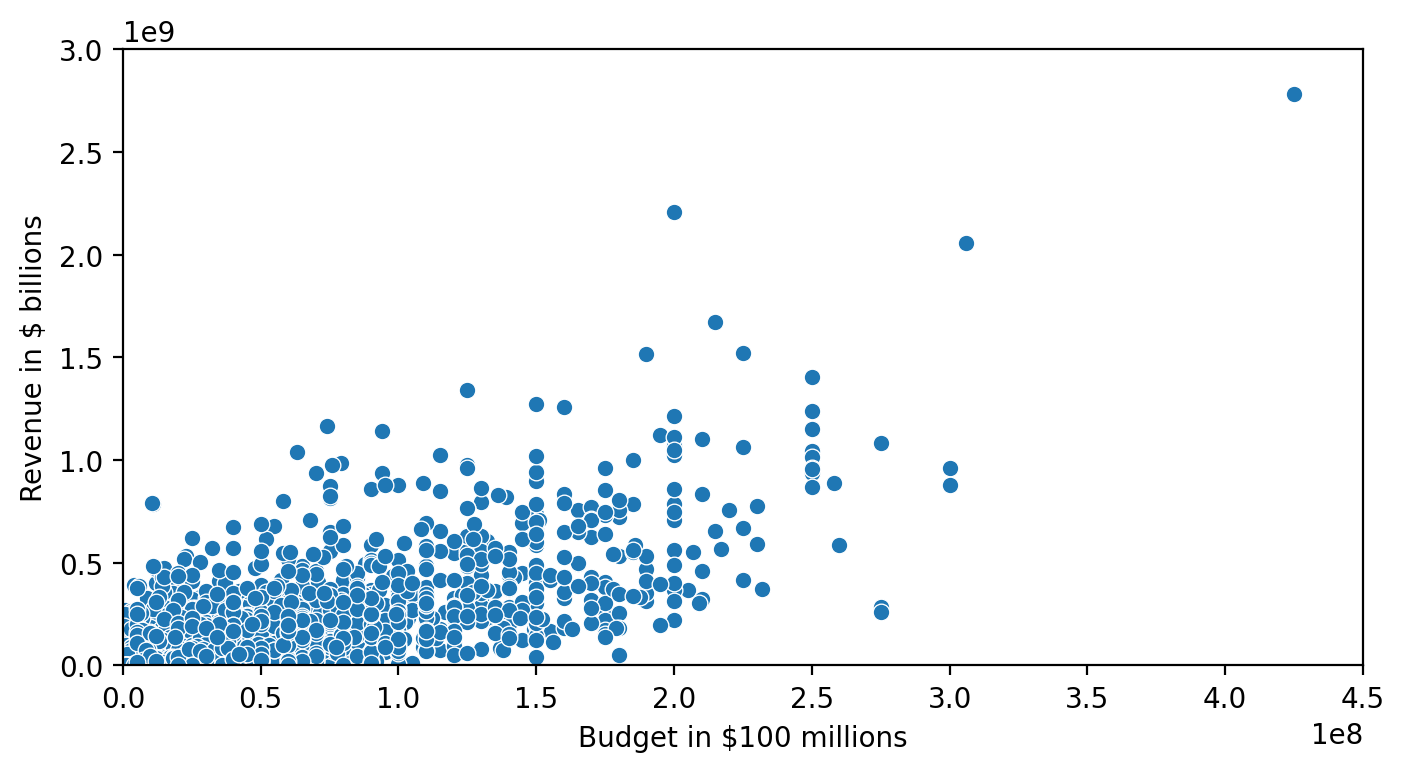

In [38]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=cleaned_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



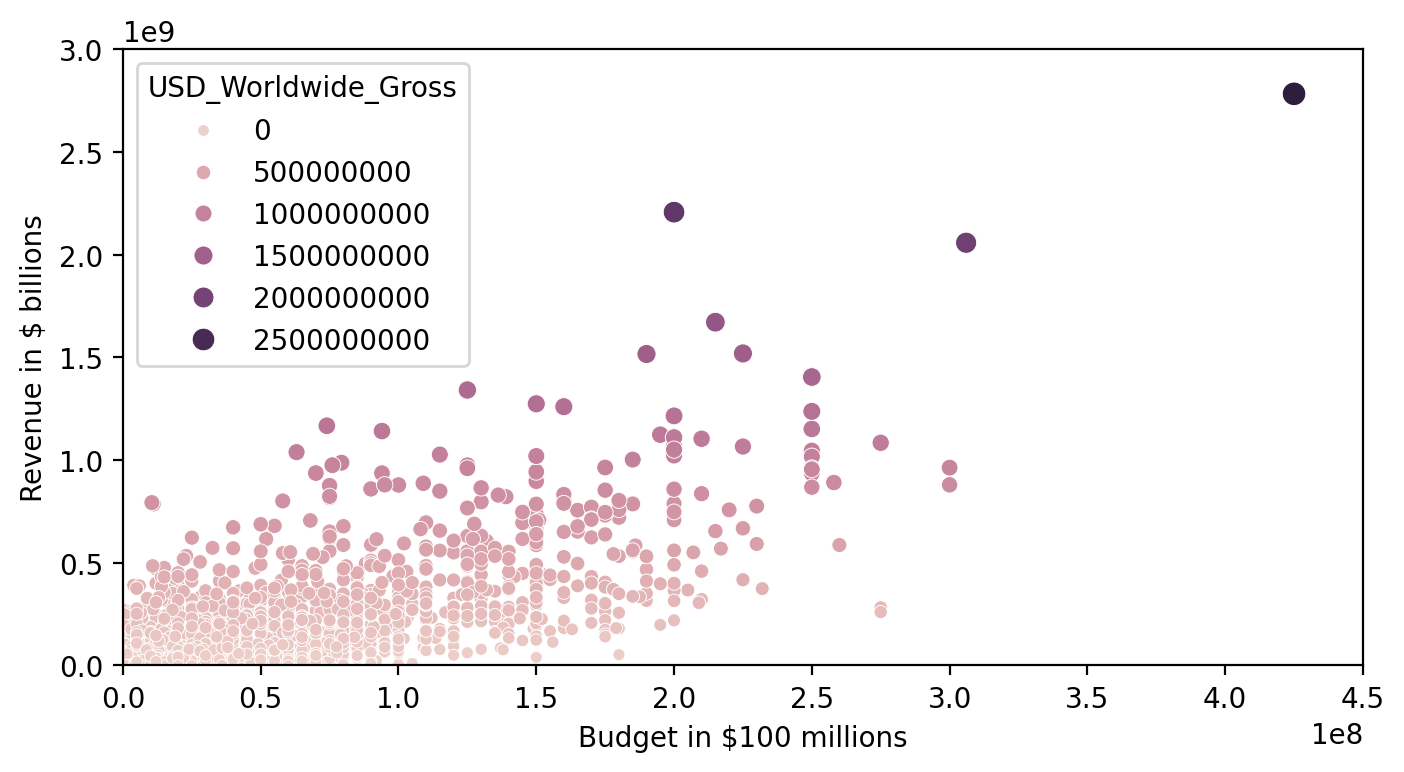

In [39]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=cleaned_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross',
                     size='USD_Worldwide_Gross'
                     )
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

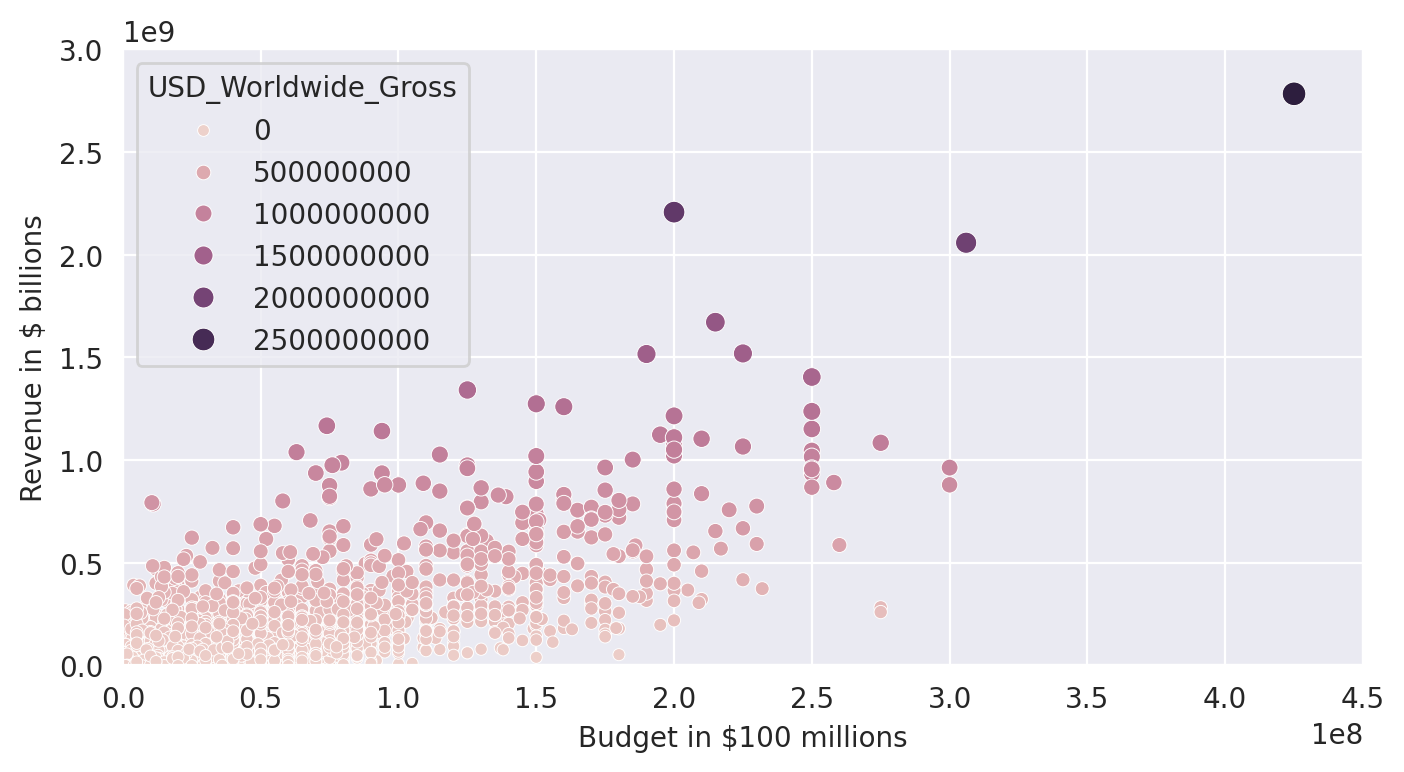

In [40]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=cleaned_data,
                        x='USD_Production_Budget', 
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross',
                        size='USD_Worldwide_Gross'
                        )
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

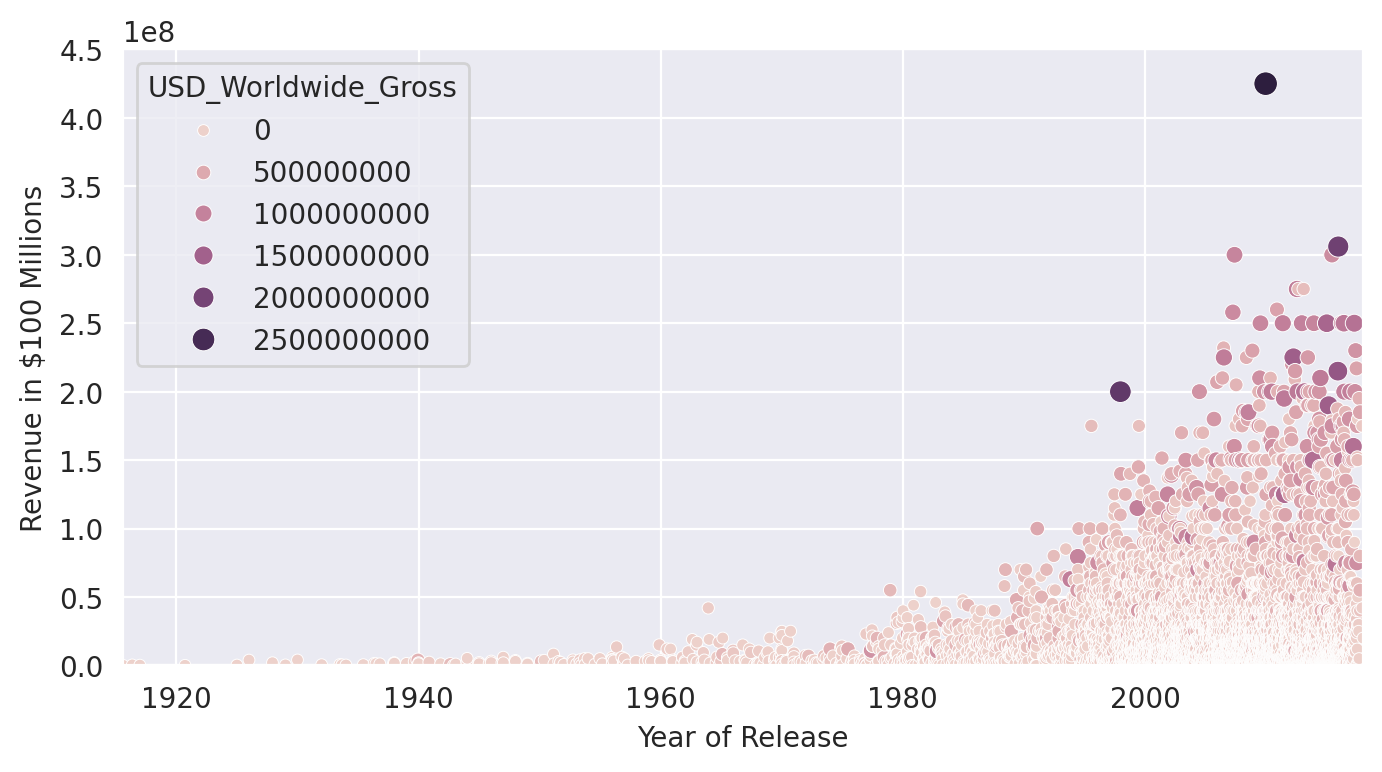

In [41]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=cleaned_data,
                        x='Release_Date', 
                        y='USD_Production_Budget',
                        hue='USD_Worldwide_Gross',
                        size='USD_Worldwide_Gross'
                        )
 
ax.set(xlim=(cleaned_data['Release_Date'].min(),cleaned_data['Release_Date'].max()),
       ylim=(0, 450000000),
       ylabel='Revenue in $100 Millions',
       xlabel='Year of Release')

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [42]:
year_index = pd.DatetimeIndex(cleaned_data['Release_Date']).year
year_index

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

In [43]:
decades = year_index // 10 * 10
decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)

In [44]:
cleaned_data['Decade'] = decades
cleaned_data

/var/folders/34/8vdbhpcx2zl870bvx5gwjjw40000gn/T/ipykernel_2108/2450566461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Decade'] = decades


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [45]:
old_films = cleaned_data[cleaned_data.Decade < 1970]
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960


In [46]:
new_films = cleaned_data[cleaned_data.Decade >= 1970]
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [47]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [48]:
print("Total Movies Released Before 1970:", old_films.shape[0])

Total Movies Released Before 1970: 153


In [49]:
print("Most Expensive Old Movie:")
print(old_films.loc[old_films['USD_Production_Budget'].idxmax()])
old_films.sort_values(by='USD_Production_Budget', ascending=False).head()

Most Expensive Old Movie:
Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

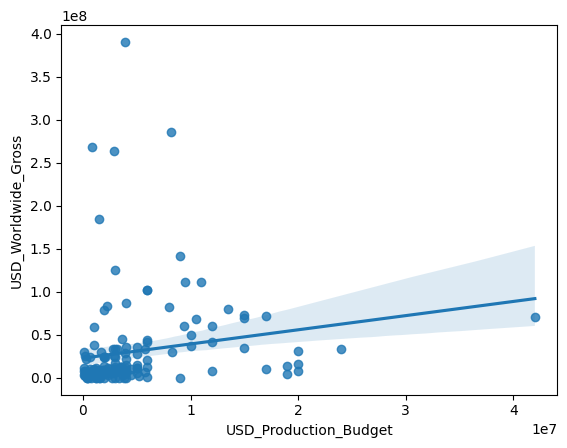

In [50]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

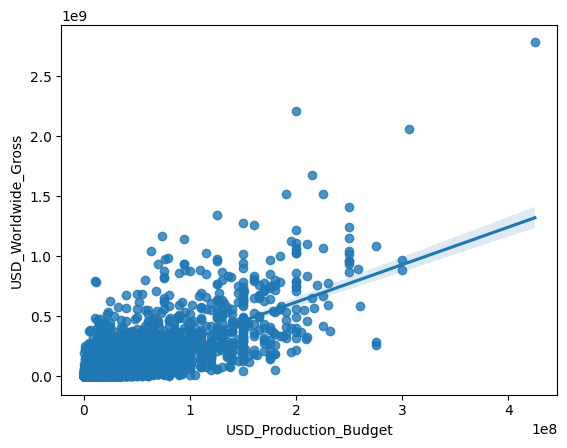

In [51]:
sns.regplot(data=new_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

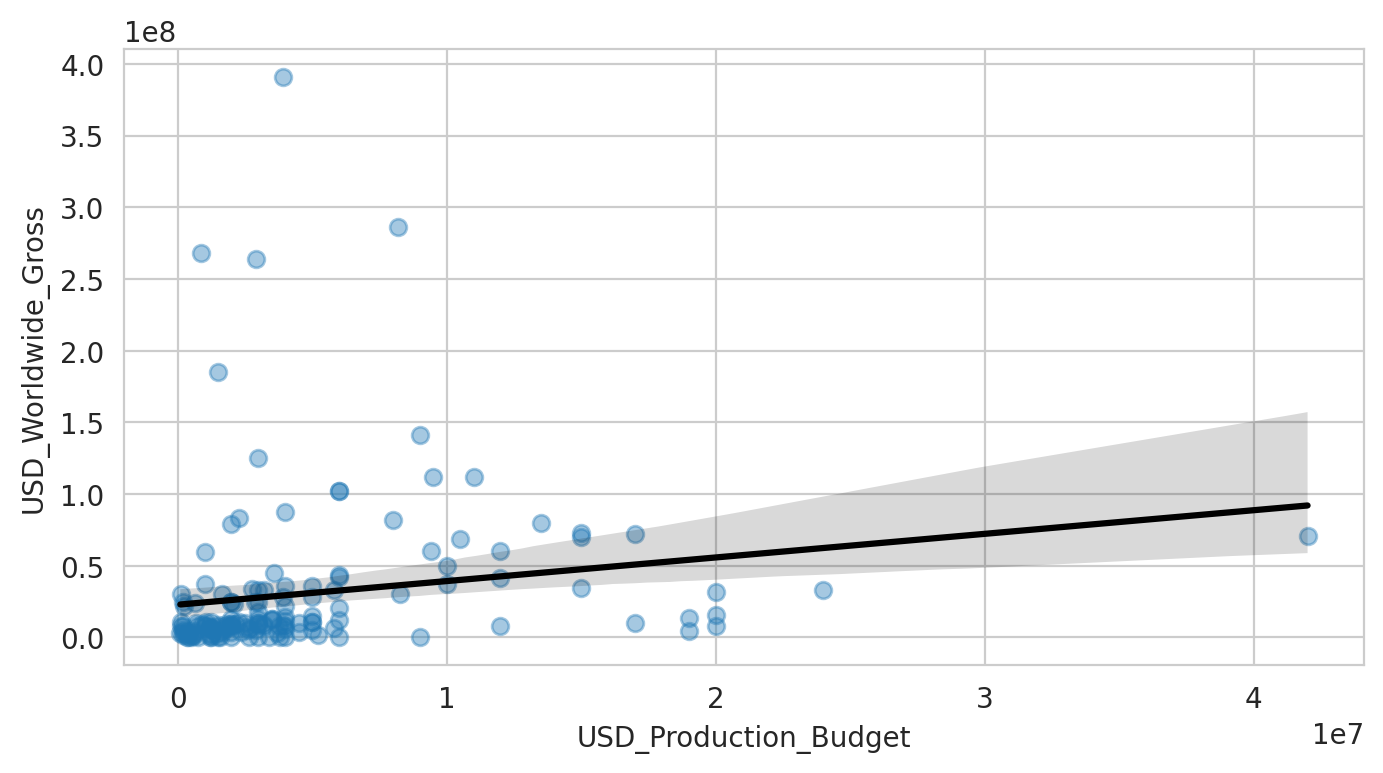

In [52]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

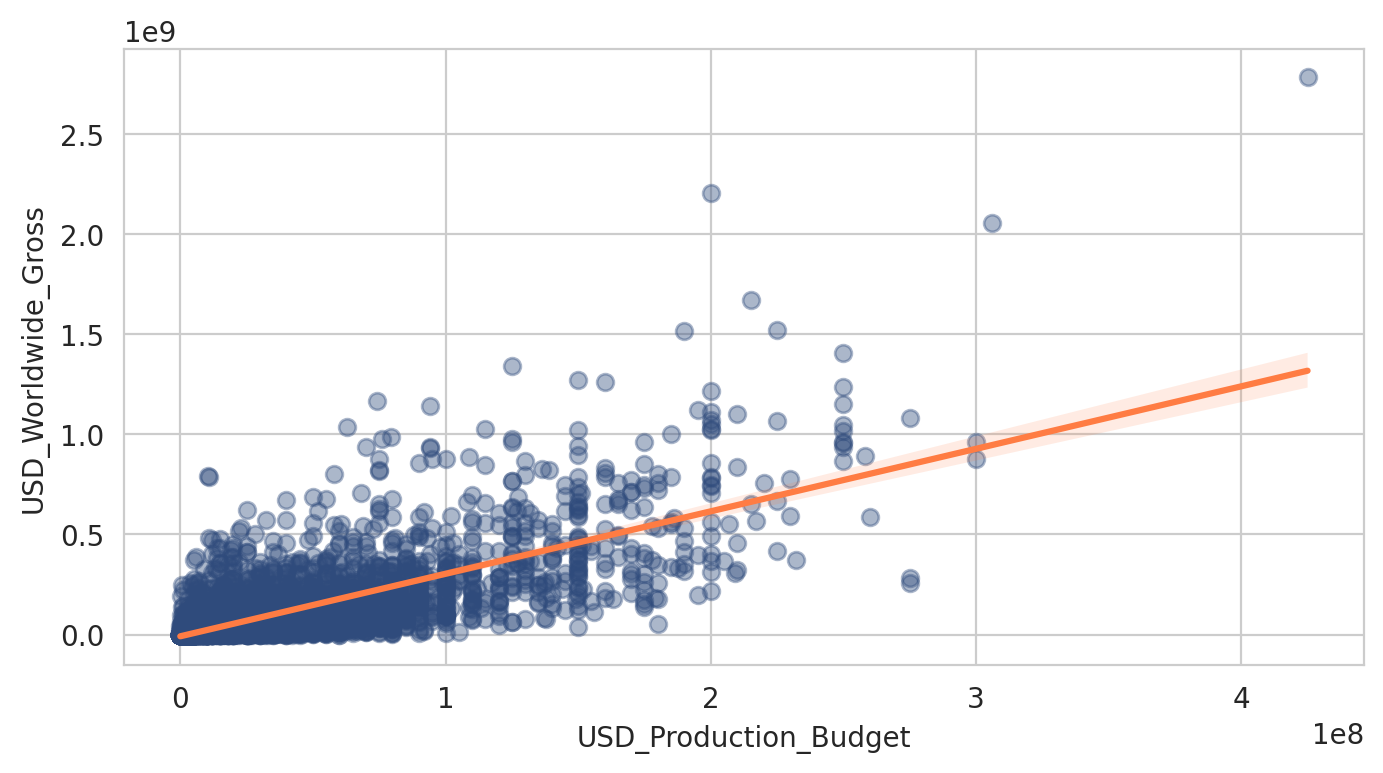

In [53]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4, 'color': '#2f4b7c'},
            line_kws = {'color': '#ff7c43'})

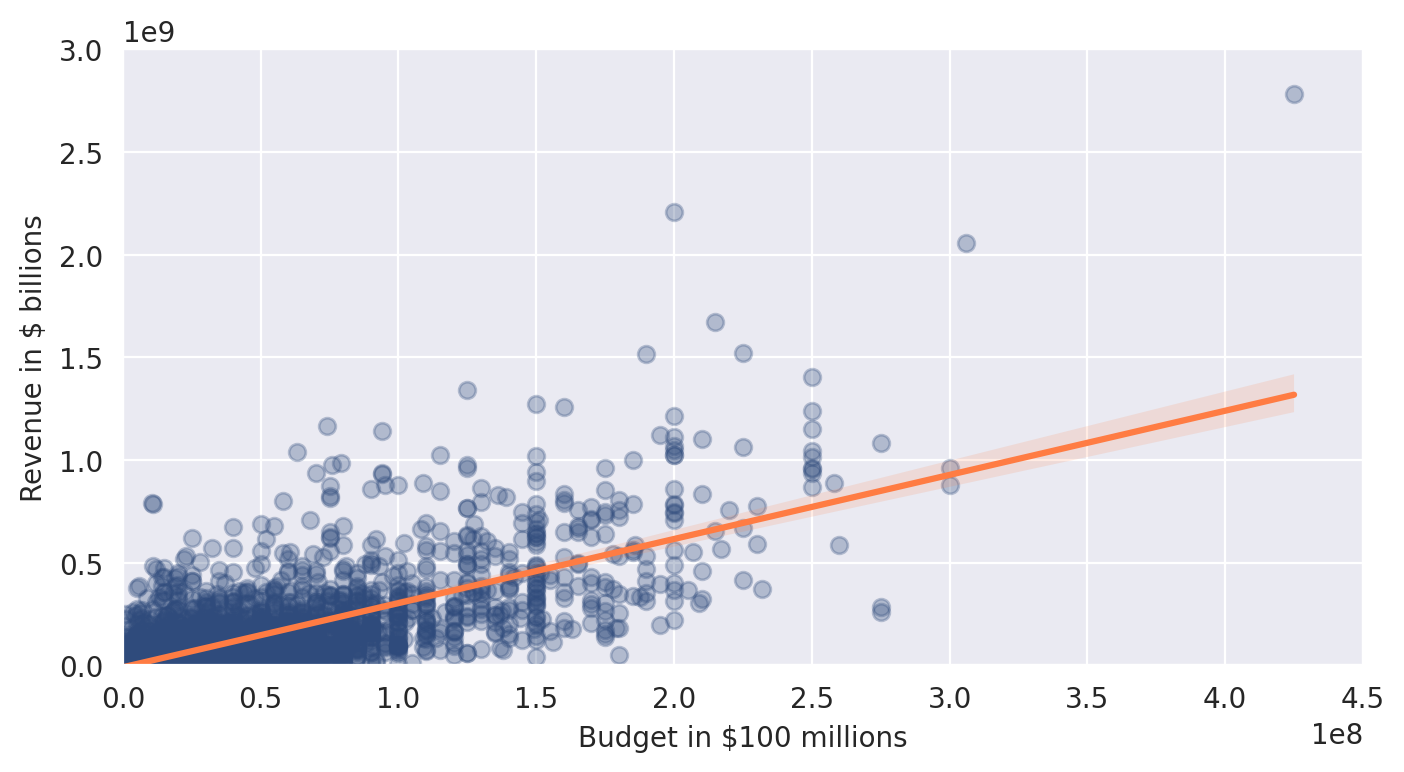

In [54]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [56]:
regression = LinearRegression()
X = pd.DataFrame(new_films['USD_Production_Budget'])
y = pd.DataFrame(new_films['USD_Worldwide_Gross'])

In [57]:
regression.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [58]:
regression.intercept_

array([-8650768.00661042])

In [59]:
regression.coef_

array([[3.12259592]])

In [60]:
regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [66]:
x = pd. DataFrame (old_films, columns=[ 'USD_Production_Budget' ])
y = pd. DataFrame (old_films, columns=[ 'USD_Worldwide_Gross' ])
regression.fit (X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression. intercept_[0]}')
print(f'The I-squared is: {regression. score (X, y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The I-squared is: 0.02937258620576877


In [62]:
X = pd.DataFrame(old_films['USD_Production_Budget'])
y = pd.DataFrame(old_films['USD_Worldwide_Gross'])

regression.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
regression.intercept_

array([22821538.63508039])

In [64]:
regression.coef_

array([[1.64771314]])

In [65]:
regression.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [79]:
Budget = 350000000 #350 million dollars
predicted_revenue = regression.intercept_[0] + regression.coef_[0,0] * Budget
predicted_revenue = round(predicted_revenue, -6)
print(f'For a movie with a production budget of ${Budget:,}, the predicted worldwide gross is ${predicted_revenue:,.2f}.')

For a movie with a production budget of $350,000,000, the predicted worldwide gross is $600,000,000.00.
